# Adding Statistical Errors

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [11]:
from LidarSim.lidar_sim import LidarSimulator

In [12]:
test_lidar = LidarSimulator("rectangle.stl")
point = [25, 25]
yaw = np.radians(90)
plot_scan = test_lidar.get_lidar_points(point[0], point[1], yaw)
triangles = test_lidar.get_env_triangles(point[0], point[1], yaw)

In [13]:
mu, sigma = 1.0, 0.01 # mean and standard deviation
s = np.random.normal(mu, sigma, plot_scan.shape[0])

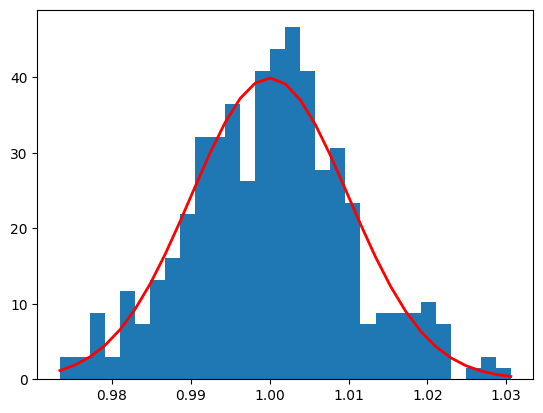

In [14]:
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')

In [15]:
plot_scan[:,1] = plot_scan[:,1] * s

Text(0.5, 1.0, 'Lidar Scann with Error')

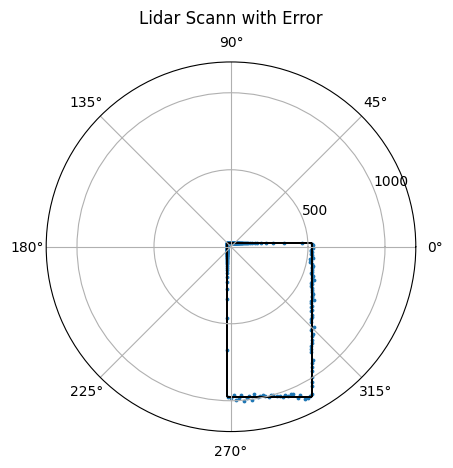

In [16]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.scatter(plot_scan[:, 0], plot_scan[:, 1], s=3.0)
for t in triangles:
    ax.fill(t[:, 0],t[:, 1],fill=False)
ax.set_rmax(1200)
ax.set_rticks([500, 1000])  # Less radial ticks
ax.grid(True)

ax.set_title("Lidar Scann with Error", va='bottom')

In [17]:
test_lidar = LidarSimulator("rectangle.stl", error=0.01)
point = [25, 25]
yaw = np.radians(90)
plot_scan = test_lidar.get_lidar_points(point[0], point[1], yaw)
triangles = test_lidar.get_env_triangles(point[0], point[1], yaw)

Text(0.5, 1.0, 'Lidar Scann with Error')

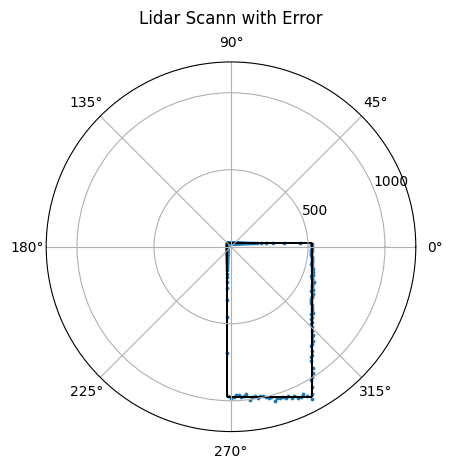

In [18]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.scatter(plot_scan[:, 0], plot_scan[:, 1], s=3.0)
for t in triangles:
    ax.fill(t[:, 0],t[:, 1],fill=False)
ax.set_rmax(1200)
ax.set_rticks([500, 1000])  # Less radial ticks
ax.grid(True)

ax.set_title("Lidar Scann with Error", va='bottom')